In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/faces-age-detection-dataset/faces/train.csv
/kaggle/input/faces-age-detection-dataset/faces/Train/19812.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/22735.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/16916.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/7981.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/22706.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/20513.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/12666.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/13288.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/20088.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/6234.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/1269.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/22288.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/24819.jpg
/kaggle/input/faces-age-detection-dataset/faces/Train/3863.jpg
/kaggle/input/faces-age-detection-dataset/faces/Tr

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
df = pd.read_csv('/kaggle/input/faces-age-detection-dataset/faces/train.csv')
df.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [5]:
df.columns

Index(['ID', 'Class'], dtype='object')

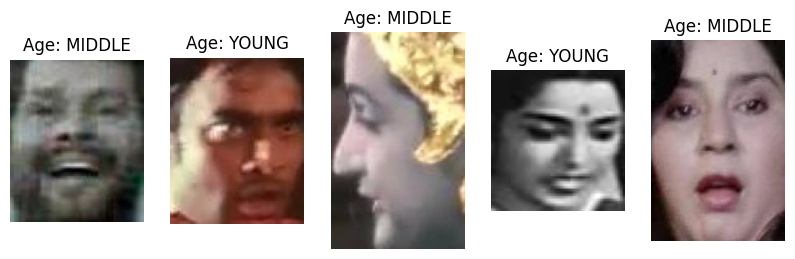

In [6]:
img_path = '/kaggle/input/faces-age-detection-dataset/faces/Train'

plt.figure(figsize=(10, 5))
for i in range(5):
    img = Image.open(os.path.join(img_path, df['ID'][i]))
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"Age: {df['Class'][i]}")
    plt.axis('off')
plt.show()

In [7]:
X = []
for fname in df['ID']:
    img = Image.open(os.path.join(img_path, fname)).resize((32, 32)).convert('L')  # Resize + Grayscale
    X.append(np.array(img).flatten())  # Flatten to 1D

X = np.array(X) / 255.0  # Normalize

le = LabelEncoder()
y = le.fit_transform(df['Class'])  # Convert age labels to integers

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.6692616775489704

Classification Report:
               precision    recall  f1-score   support

      MIDDLE       0.66      0.88      0.75      2181
         OLD       0.81      0.07      0.13       471
       YOUNG       0.69      0.53      0.60      1330

    accuracy                           0.67      3982
   macro avg       0.72      0.50      0.50      3982
weighted avg       0.69      0.67      0.63      3982



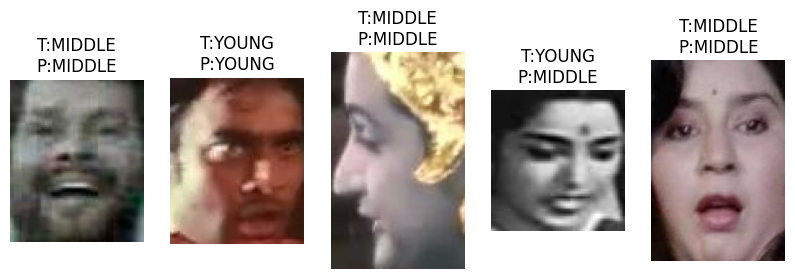

In [11]:
plt.figure(figsize=(10, 5))
for i in range(5):
    img = Image.open(os.path.join(img_path, df['ID'].iloc[i]))
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    true_label = df['Class'].iloc[i]
    pred_label = le.inverse_transform([model.predict([X[i]])[0]])[0]
    plt.title(f"T:{true_label}\nP:{pred_label}")
    plt.axis('off')
plt.show()